# Figure 3H - Slow Scale

(1700, 2250)


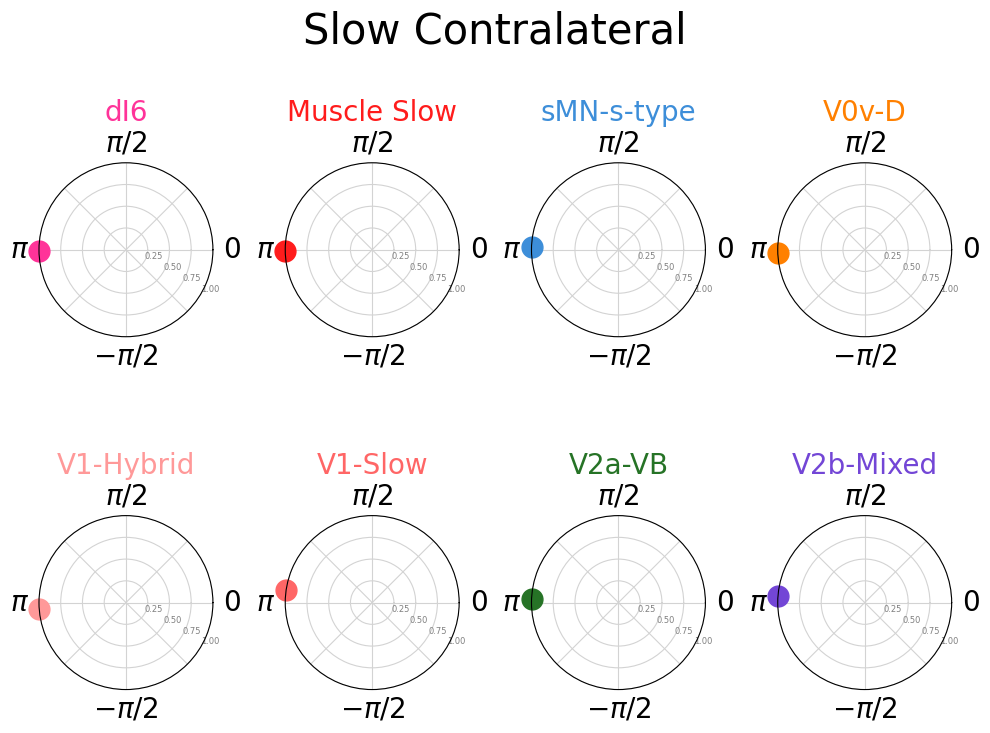

In [3]:
import pandas as pd
from PhaseDelay import PhaseDelayGenerator
from Const import SWIM_MODE, NETWORK_POOLS, CELL_GROUPS, CELL_GROUP_POOLS, TIME_MIN_SIF, TIME_MAX_SIF, SLOW

PDG = PhaseDelayGenerator()
PDG.lim_min = 10
PDG.lim_max = 200
raw_data = pd.read_csv("SlowScale-FullExport.csv", index_col=0)
run_mode = SLOW # slow
somite = 5
target_pools = NETWORK_POOLS[run_mode]
target_pools = sorted(target_pools, key=lambda s: s.lower())

filename  = ""
for i in range(3, 4):
    time_range = (TIME_MIN_SIF[i], TIME_MAX_SIF[i])
    print(time_range)
    PDG.generate_polar_phase_data(raw_data, 
                                  target_pools,  target_pools, 
                                  somite, somite,  
                                  run_mode, 
                                  side="Contralateral", 
                                  time_range= time_range,
                                  auto_corr= True)
    PDG.plot_polar_phase_plots(filename, num_cols = 4)


# Figure 4F - Inter II of Sequential

(1700, 2250)


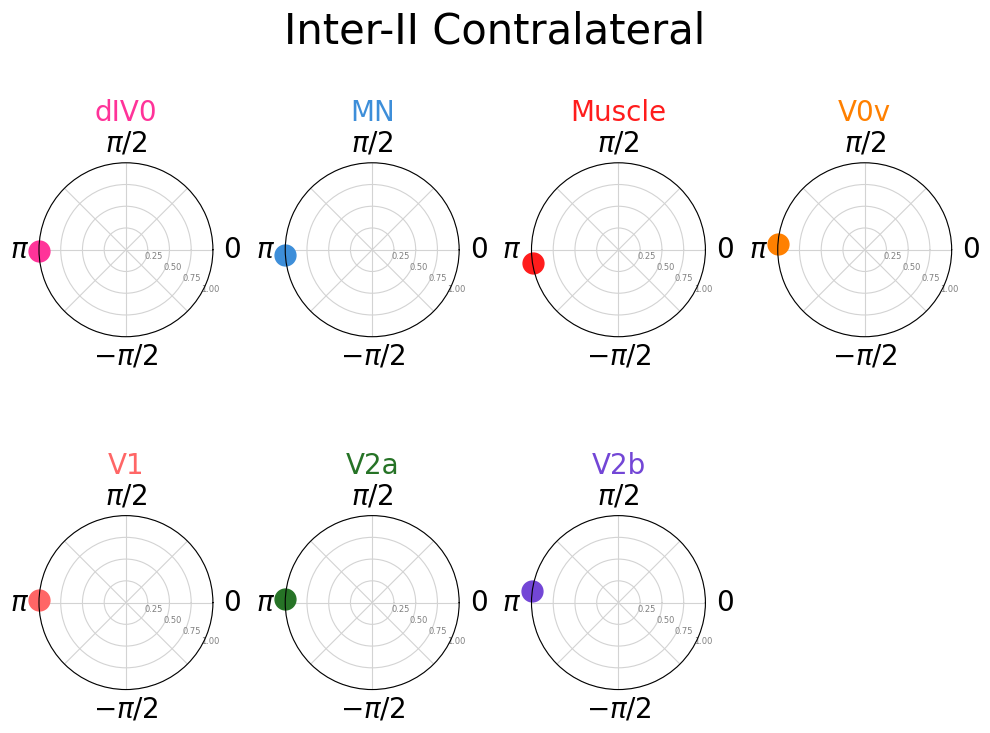

In [5]:
import pandas as pd
from PhaseDelay import PhaseDelayGenerator
from Const import NETWORK_POOLS, CELL_GROUPS, TIME_MIN_SIF, TIME_MAX_SIF, INTER_II

PDG = PhaseDelayGenerator()
PDG.lim_min = 20
PDG.lim_max = 200
raw_data = pd.read_csv("SIF-FullExport.csv", index_col=0)
run_mode = INTER_II 
somite = 5
filename  = ""

#grouped auto correlation for active populations only
data_summary = raw_data.copy()
active_pools = set(CELL_GROUPS.keys()).intersection(NETWORK_POOLS[run_mode])
active_groups = []
for cell_pool in active_pools:
    cell_group = CELL_GROUPS[cell_pool]
    active_groups.append(cell_group)
    data_summary.columns = data_summary.columns.str.replace(cell_pool, cell_group)

#Merge columns with the same name by summing up their values
data_summary = data_summary.T.groupby(data_summary.columns).sum().T
active_groups = set(active_groups)
active_groups = sorted(active_groups, key=lambda s: s.lower())

for i in range(3, 4):
    time_range = (TIME_MIN_SIF[i], TIME_MAX_SIF[i])
    print(time_range)
    PDG.generate_polar_phase_data(data_summary, 
                                  active_groups,  active_groups, 
                                  somite, somite,  
                                  run_mode, 
                                  side="Contralateral", 
                                  time_range= time_range,
                                  auto_corr= True)
    PDG.plot_polar_phase_plots(filename, num_cols = 4)


# Figure 5E - Fast Scale

(1700, 2250)


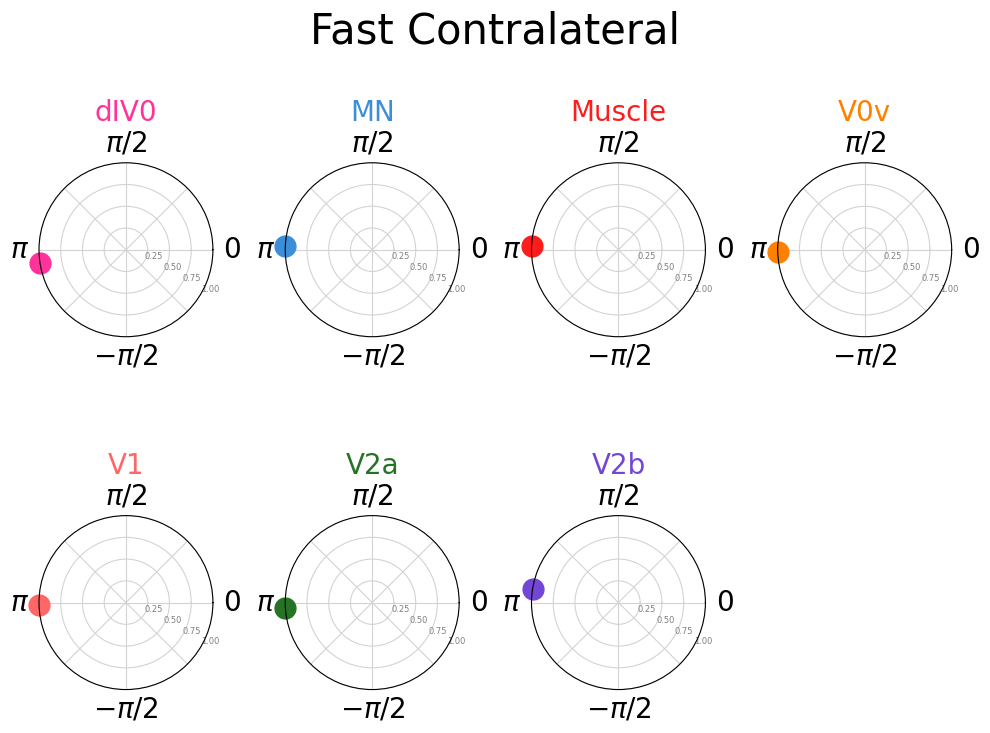

In [4]:
import pandas as pd
from PhaseDelay import PhaseDelayGenerator
from Const import NETWORK_POOLS, CELL_GROUPS, TIME_MIN_SIF, TIME_MAX_SIF, FAST

PDG = PhaseDelayGenerator()
PDG.lim_min = 5
PDG.lim_max = 200
raw_data = pd.read_csv("FastScale-FullExport.csv", index_col=0)
run_mode = FAST
somite = 5
filename  = ""

#grouped auto correlation for active populations only
data_summary = raw_data.copy()
active_pools = set(CELL_GROUPS.keys()).intersection(NETWORK_POOLS[run_mode])
active_groups = []
for cell_pool in active_pools:
    cell_group = CELL_GROUPS[cell_pool]
    active_groups.append(cell_group)
    data_summary.columns = data_summary.columns.str.replace(cell_pool, cell_group)

#Merge columns with the same name by summing up their values
data_summary = data_summary.T.groupby(data_summary.columns).sum().T
active_groups = set(active_groups)
active_groups = sorted(active_groups, key=lambda s: s.lower())

for i in range(3, 4):
    time_range = (TIME_MIN_SIF[i], TIME_MAX_SIF[i])
    print(time_range)
    PDG.generate_polar_phase_data(data_summary, 
                                  active_groups,  active_groups, 
                                  somite, somite,  
                                  run_mode, 
                                  side="Contralateral", 
                                  time_range= time_range,
                                  auto_corr= True)
    PDG.plot_polar_phase_plots(filename, num_cols = 4)